<a href="https://colab.research.google.com/github/Jayesh-Panchal/Supervised-ML-Classification-Cardiovascular-Risk-Prediction-/blob/main/Cardiovascular_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Data_path = "/content/drive/MyDrive/AlmaBetter/Capstone Projects/Capstone Project 3 - Cardiovascular Risk/"


# Importing TED Talks Data File.
Risk_df = pd.read_csv(Data_path + "data_cardiovascular_risk.csv")

In [ ]:
Risk_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
Risk_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
Risk_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
Risk_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
Risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# checking the total missing values in the dataset.
Risk_df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# dropping the missing value as we cannot fill with different technique as this datas are related to medical domain (which varies from person to person).
df = Risk_df.dropna(how = "any")
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [ ]:
df.drop(columns=['id'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
#checking the total people who are at risk with the CHD.
df["TenYearCHD"].value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


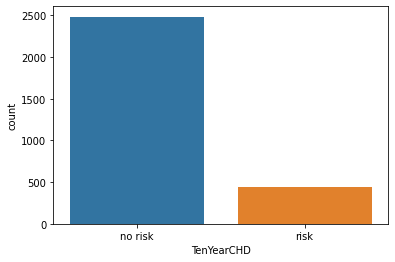

In [ ]:
g = sns.countplot(df['TenYearCHD'])
g.set_xticklabels(['no risk','risk'])
plt.show()

In [ ]:
#cpunting numbers of males and females.
df["sex"].value_counts()

F    1620
M    1307
Name: sex, dtype: int64

In [ ]:
#counting the number of smokers.
Risk_df["is_smoking"].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [ ]:
df["diabetes"].value_counts()

0    2848
1      79
Name: diabetes, dtype: int64

In [ ]:
df['sex'] = df['sex'].map(
                   {'M':1 ,'F': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['is_smoking'] = df['is_smoking'].map(
                   {'YES':1 ,'NO': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## EDA

In [ ]:
#differentiating the numerical and categorical features
categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

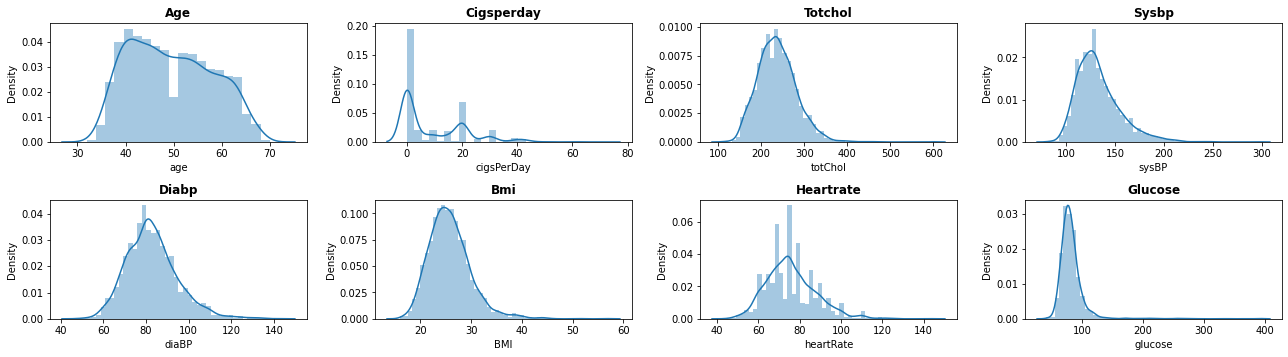

In [ ]:
# Visualizing the distributions.
plt.figure(figsize=(18,12))
for i, column in enumerate(numeric_features):
  plt.subplot(5, 4, i+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

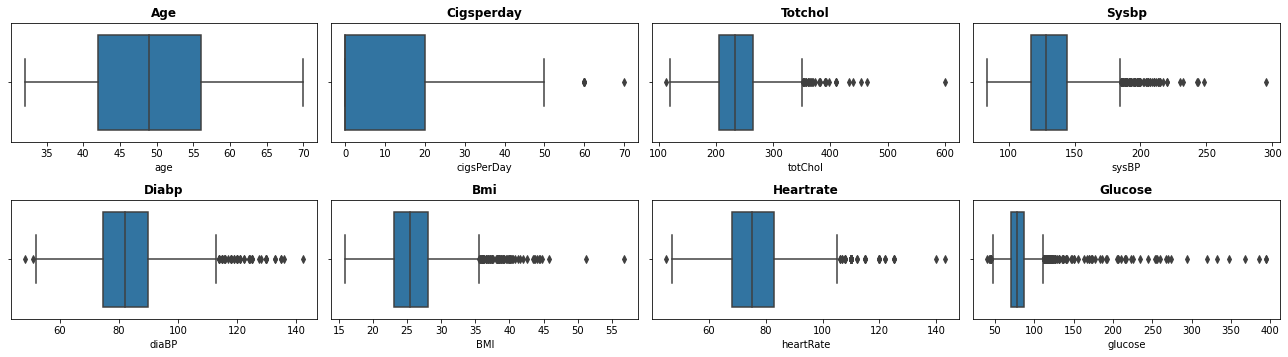

In [ ]:
plt.figure(figsize=(18,12))
for i,column in enumerate(numeric_features):
  plt.subplot(5, 4, i+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

**UNIVARIATE ANALYSIS**

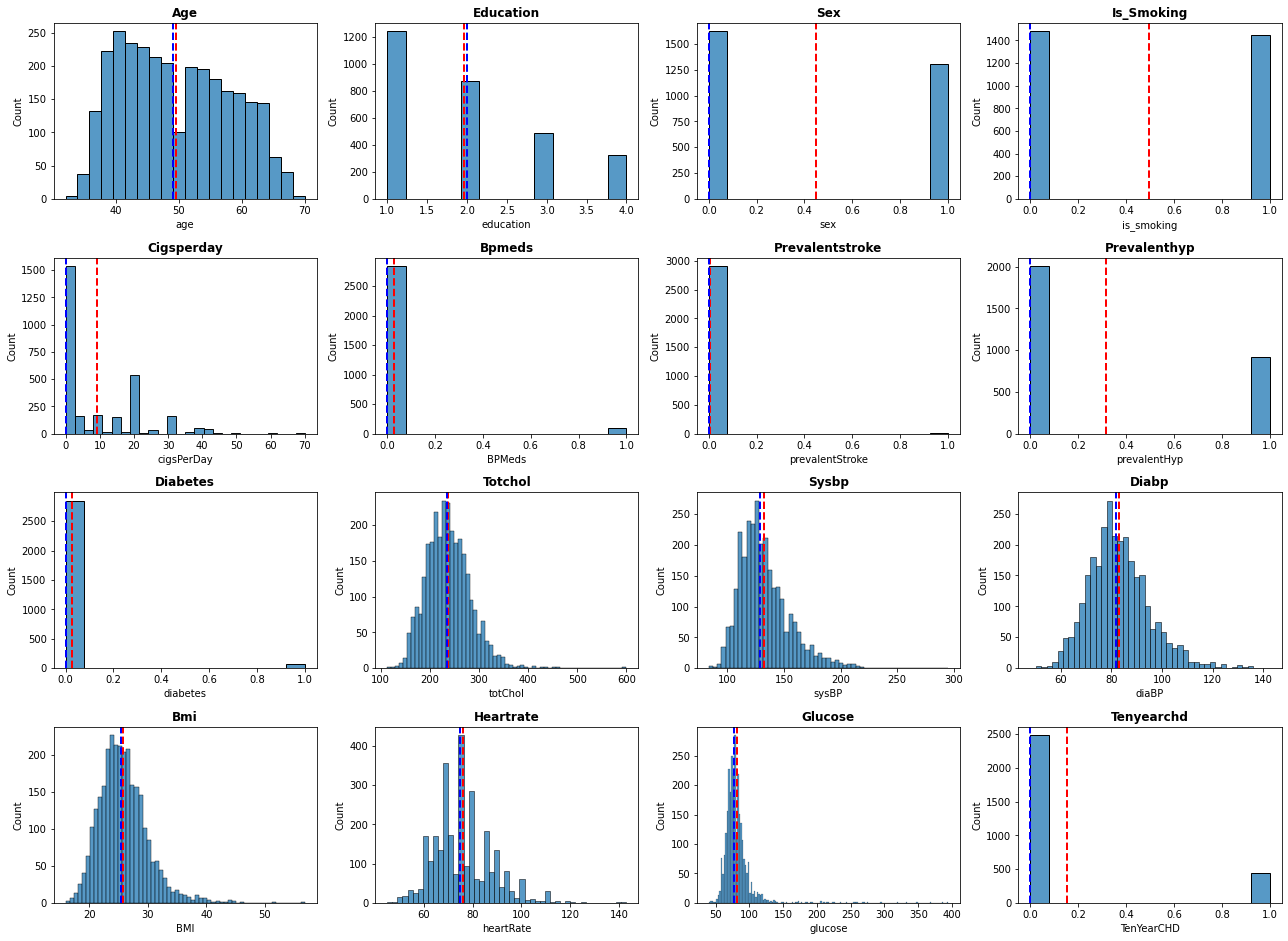

In [ ]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for i, column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5, 4, i+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

**BIVARIATE ANALYSIS**

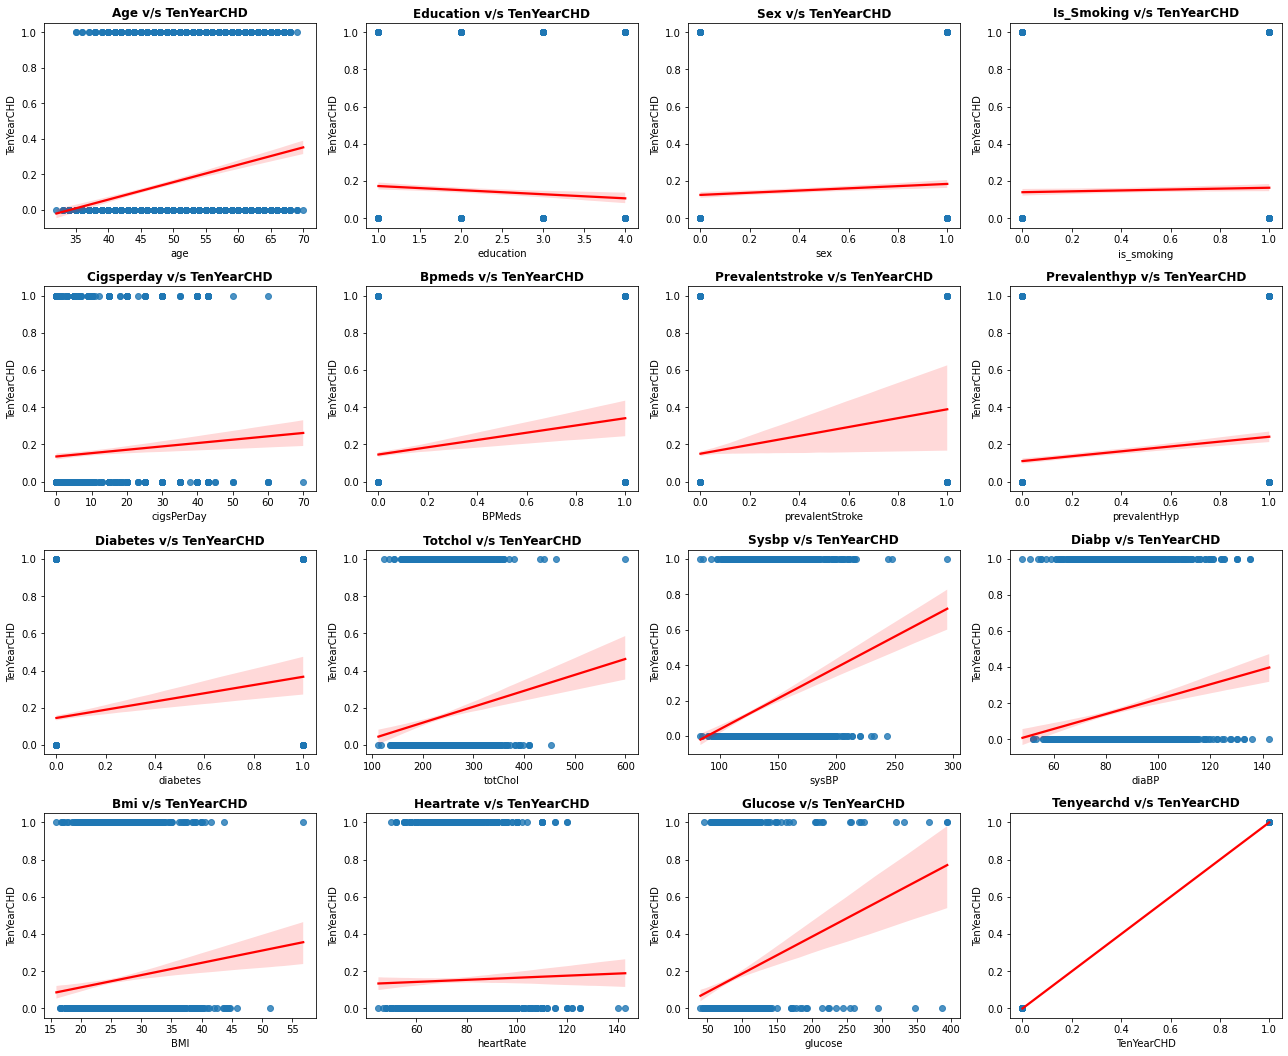

In [ ]:
# Checking Linearity
independent_variables = [i for i in df.columns if i not in ['id', 'TenYearCHD']]

plt.figure(figsize=(18,18))
for n, column in enumerate(df.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df[column], y =df['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

**MULTIVARIATE ANALYSIS**

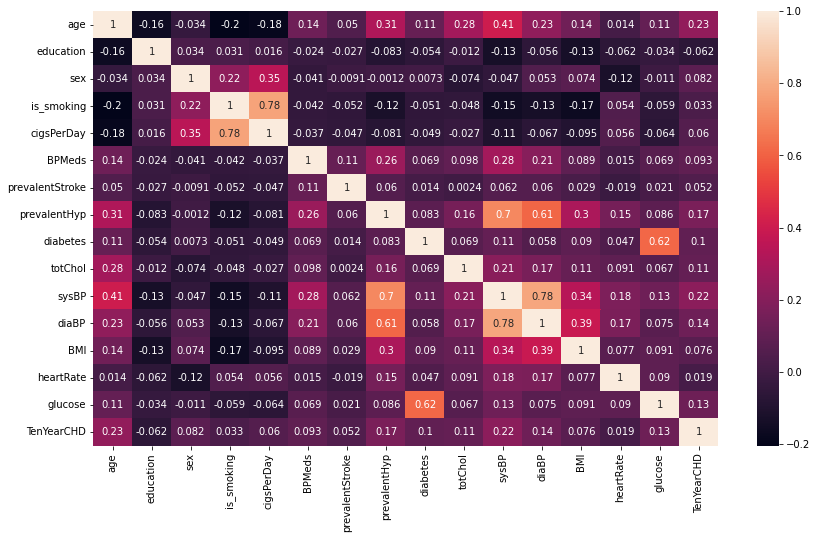

In [ ]:
correlmap = df.corr()
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

## Model Building

### Prerequisites

In [ ]:
X = df.drop('TenYearCHD',axis=1).values
y = df['TenYearCHD'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [ ]:
pd.DataFrame(y_train).value_counts()

0    1986
1     355
dtype: int64

In [ ]:
pd.DataFrame(y_test).value_counts()

0    497
1     89
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler_range = MinMaxScaler()
scaler_range.fit(X_train)

MinMaxScaler()

In [ ]:
df_train_scaled = pd.DataFrame(scaler_range.transform(X_train))
df_test_scaled = pd.DataFrame(scaler_range.transform(X_test))

In [ ]:
from imblearn.combine import SMOTETomek
X_smote, y_smote = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

In [ ]:
#dataframe to contain results
res_df=pd.DataFrame()


## KNN

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_smote, y_smote)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_smote, y_smote)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

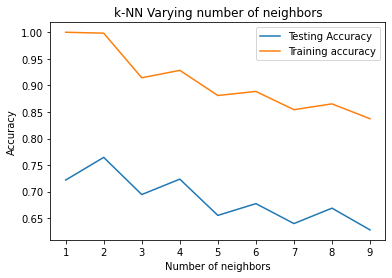

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Fit the model
knn.fit(X_smote,y_smote)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
res_df

,Model,Classification Report,0,1,accuracy,macro avg,weighted avg
0,K-Nearest Neighbours Classifier,precision recall f1-score ...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,"{'precision': 0.8701030927835052, 'recall': 0....","{'precision': 0.25742574257425743, 'recall': 0...",0.764505,"{'precision': 0.5637644176788813, 'recall': 0....","{'precision': 0.7770514133148652, 'recall': 0...."


In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [ ]:
# Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[422,  75],
       [ 63,  26]])

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

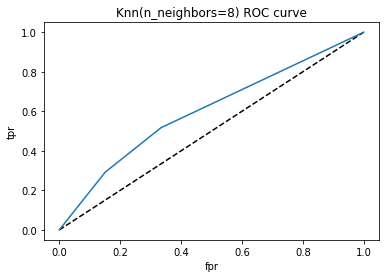

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=8) ROC curve')
plt.show()

In [ ]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6012140257273981

In [ ]:
# Finding precision and recall
from sklearn.metrics import precision_score, recall_score
recall_score(y_test, y_pred)

0.29213483146067415

In [ ]:
precision_score(y_test, y_pred)


0.25742574257425743

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_smote,y_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.8852983112990678

In [ ]:
knn_cv.best_params_

{'n_neighbors': 2}

In [ ]:
from sklearn.metrics import classification_report 
#adding results to results df
dict1= classification_report(y_test,y_pred,output_dict=True)
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'K Nearest Neighbours Classifier'

res_df=res_df.append(tempodf)

In [ ]:
classification_report(y_test, y_pred)
            

'              precision    recall  f1-score   support\n\n           0       0.87      0.85      0.86       497\n           1       0.26      0.29      0.27        89\n\n    accuracy                           0.76       586\n   macro avg       0.56      0.57      0.57       586\nweighted avg       0.78      0.76      0.77       586\n'

In [ ]:
res_df

,precision,recall,f1-score,support,Model
0,0.870103,0.849095,0.859470,497.000000,K Nearest Neighbours Classifier
1,0.257426,0.292135,0.273684,89.000000,K Nearest Neighbours Classifier
accuracy,0.764505,0.764505,0.764505,0.764505,K Nearest Neighbours Classifier
macro avg,0.563764,0.570615,0.566577,586.000000,K Nearest Neighbours Classifier
weighted avg,0.777051,0.764505,0.770503,586.000000,K Nearest Neighbours Classifier


## Naive Bayes

In [ ]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_smote, y_smote)
 
# making predictions on the testing set
y_test_pred = gnb.predict(X_test)
y_train_pred = gnb.predict(X_smote)



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train_pred,y_smote))
print(accuracy_score(y_test_pred,y_test))

0.5984231943031536
0.8191126279863481


In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[443,  54],
       [ 52,  37]])

In [ ]:

#adding results to results df
dict1= classification_report(y_test,y_test_pred,output_dict=True)
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Gaussian Naive Bayes Classifier'

res_df=res_df.append(tempodf)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(df_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(df_train_scaled)
test_preds = clf.predict_proba(df_test_scaled)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(df_train_scaled)
test_class_preds = clf.predict(df_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8539085860743272
The accuracy on test data is  0.8532423208191127


In [ ]:
#adding results to results df
dict1= {'Model':'Logistic Regression Classifier','Training R2':clf.score(X_smote,y_smote), 'Test R2':clf.score(X_test,y_test)}
res_df=res_df.append(dict1,ignore_index=True)

In [ ]:
confusion_matrix(y_test,test_class_preds)

array([[495,   2],
       [ 84,   5]])

In [ ]:
#adding results to results df
dict1= classification_report(y_test,y_pred,output_dict=True)
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Logistic Regressioin'

res_df=res_df.append(tempodf)

In [ ]:
res_df

,precision,recall,f1-score,support,Model
0,0.870103,0.849095,0.859470,497.000000,K Nearest Neighbours Classifier
1,0.257426,0.292135,0.273684,89.000000,K Nearest Neighbours Classifier
accuracy,0.764505,0.764505,0.764505,0.764505,K Nearest Neighbours Classifier
macro avg,0.563764,0.570615,0.566577,586.000000,K Nearest Neighbours Classifier
weighted avg,0.777051,0.764505,0.770503,586.000000,K Nearest Neighbours Classifier
0,0.894949,0.891348,0.893145,497.000000,Gaussian Naive Bayes Classifier
1,0.406593,0.415730,0.411111,89.000000,Gaussian Naive Bayes Classifier
accuracy,0.819113,0.819113,0.819113,0.819113,Gaussian Naive Bayes Classifier
macro avg,0.650771,0.653539,0.652128,586.000000,Gaussian Naive Bayes Classifier
weighted avg,0.820779,0.819113,0.819935,586.000000,Gaussian Naive Bayes Classifier


## SVM

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svmc = svm.SVC(kernel='poly') # Polynomial Kernel

#Train the model using the training sets
svmc.fit(df_train_scaled, y_train)

#Predict the response for test dataset
y_pred = svmc.predict(df_test_scaled)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
svmc.score(df_test_scaled,y_test)


0.8498293515358362

In [ ]:
#adding results to results df
dict1= {'Model':'Scalar Vector machine','Training R2':clf.score(X_smote,y_smote), 'Test R2':clf.score(X_test,y_test)}
res_df=res_df.append(dict1,ignore_index=True)

## XGB Classifier

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_smote, y_smote)
print(); print(model)


XGBClassifier()


In [ ]:
# making predictions on the testing set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_smote)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train_pred,y_smote))
print(accuracy_score(y_test_pred,y_test))

0.896236012207528
0.8310580204778157


In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[474,  23],
       [ 76,  13]])

## NN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# function to build the keras model
def create_model(a,b):
    # create model
   
    model = Sequential()
    model.add(Dense(a, input_dim=16, activation='sigmoid'))
    model.add(Dense(b, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
 
    return model

In [ ]:
model = create_model(20,20)
model.fit(X_smote, y_smote, epochs=100, verbose=2)

Epoch 1/100


ValueError: ignored

In [ ]:
model.summary()
score_train = model.evaluate(X_smote, y_smote, verbose=1)
score_test = model.evaluate(X_test, y_test, verbose=1)
print('Model Accuracy(train) = ',score_train[1])
print('Model Accuracy(test) = ',score_test[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 512)               8192      
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)               

ValueError: ignored

## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_smote,y_smote)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
# rf = RandomForestClassifier()

rf.fit(X_smote,y_smote)
Y_pred_rf = rf.predict(X_test)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random forest is: " + str(score_rf)+" %")

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Y_pred_rf)

In [ ]:
y_pred_train_rf = rf.predict(X_smote)

In [ ]:
score_rf = round(accuracy_score(y_pred_train_rf, y_smote)*100,2)

print("The accuracy score achieved using random forest is: " + str(score_rf)+" %")

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_smote,y_smote)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_smote,y_smote)
Y_pred_dt = dt.predict(X_test)

In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['TenYearCHD'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 2927
Resampled dataset shape 4966


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [ ]:
from tensorflow import keras

def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[-1]]),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(9, activation='softmax')
    ])
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
import tensorflow as tf

batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len(x_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

model = get_model()
fit = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
8/8 [==============================] - 2s 76ms/step - loss: 3.2478 - accuracy: 0.3077 - val_loss: 1.6127 - val_accuracy: 0.4889
Epoch 2/20
8/8 [==============================] - 0s 39ms/step - loss: 1.6635 - accuracy: 0.3663 - val_loss: 1.0826 - val_accuracy: 0.4668
Epoch 3/20
8/8 [==============================] - 0s 55ms/step - loss: 1.5459 - accuracy: 0.4164 - val_loss: 1.0946 - val_accuracy: 0.5181
Epoch 4/20
8/8 [==============================] - 0s 38ms/step - loss: 1.4355 - accuracy: 0.4486 - val_loss: 0.9238 - val_accuracy: 0.6066
Epoch 5/20
8/8 [==============================] - 0s 47ms/step - loss: 1.3391 - accuracy: 0.4884 - val_loss: 0.8776 - val_accuracy: 0.5302
Epoch 6/20
8/8 [==============================] - 0s 41ms/step - loss: 1.3105 - accuracy: 0.4952 - val_loss: 0.8253 - val_accuracy: 0.6217
Epoch 7/20
8/8 [==============================] - 0s 34ms/step - loss: 1.2682 - accuracy: 0.4927 - val_loss: 0.7926 - val_accuracy: 0.5976
Epoch 8/20
8/8 [===========

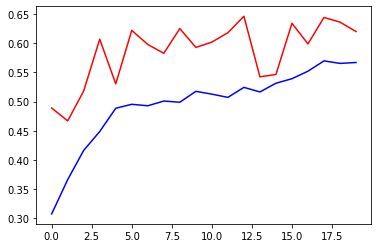

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fit.history['accuracy'], color='blue')
plt.plot(fit.history['val_accuracy'], color='red')
plt.show()